In [90]:
#import tarfile
import xarray as xr
import rioxarray as rio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import geopandas as gpd
from shapely import box

# file = tarfile.open('aviris.tar.gz') 
# # view names of files
# print(file.getnames())
# file.extractall('./aviris_data') 
# file.close() 

# open img file
rad = rio.open_rasterio('aviris_data/f090705t01p00r09rdn_b/f090705t01p00r09rdn_b_ort_img')

rad = rad.rio.write_crs(32618).rio.set_spatial_dims(
    x_dim="x",
    y_dim="y",
    ).rio.write_coordinate_system("epsg:32618")

rad = rad.rename({'xc':'longitude','yc': 'latitude'})

# clip to Catskills

# get roi polygon
polys = gpd.read_file('beech_stands/Beech Stand Polygons.kml')
polys = polys.to_crs(32618)
b = box(*polys.total_bounds)
b_df = gpd.GeoDataFrame(
    geometry=[b],
    crs="EPSG:32618"
)

rad_clip = rad.rio.clip(b_df.geometry.values)


In [93]:
rad_clip = rad.rio.clip(b_df.geometry.values)

c:\Users\roseh\miniconda3\envs\beech-env\Lib\site-packages\rioxarray\rioxarray.py:692: UserWarning: Transform that is non-rectilinear or with rotation found. Unable to recalculate.
  warnings.warn(
c:\Users\roseh\miniconda3\envs\beech-env\Lib\site-packages\rioxarray\rioxarray.py:692: UserWarning: Transform that is non-rectilinear or with rotation found. Unable to recalculate.
  warnings.warn(
c:\Users\roseh\miniconda3\envs\beech-env\Lib\site-packages\xarray\core\duck_array_ops.py:213: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)


In [94]:
# get list of gain factors for each band
gain_list = []
with open('aviris_data/f090705t01p00r09rdn_b/f090705t01p00r09rdn_b_gain', 'r') as f:
    for line in f:
        line = line.strip()
        gain_list.append(float(line.split(' ')[0]))
    print(gain_list)

# convert list to data array
gain_array = xr.DataArray(
    gain_list,
    dims=["band"],
    coords={"band": rad.band},
)

[300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0, 600.0

In [95]:
# apply gain factor to each band
result = rad_clip / gain_array

In [97]:
# save to disk
result.to_netcdf('aviris_data/radiance_catskills.nc')

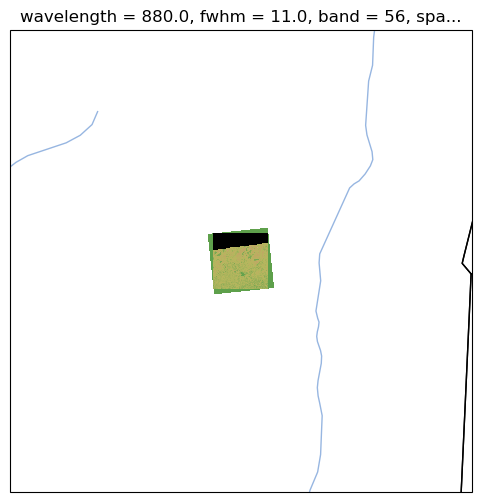

In [96]:
# plot result on map
extent = [int(result.longitude.min())-50000, int(result.longitude.max()+50000),int(result.latitude.min()-50000),int(result.latitude.max()+50000)]
map_crs = ccrs.epsg(32618)

plt.figure(figsize=(14, 6))
ax = plt.axes(projection=map_crs)
ax.set_extent(extent, crs=map_crs)


ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.RIVERS)

result.isel(band=55).plot.pcolormesh(
    ax=ax, transform=map_crs, x="longitude", y="latitude", add_colorbar=False,cmap='gist_earth')


plt.show()

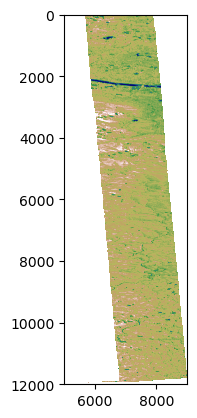

In [36]:
plt.imshow(b56,cmap='gist_earth',extent=(5000,9000.0,12000.0,0.0),clim=(0,5000)) 

In [34]:
reflectance = (np.pi * radiance_data) / (solar_irradiance * np.cos(solar_zenith_angle))

ModuleNotFoundError: No module named 'skimage'